# EDA

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

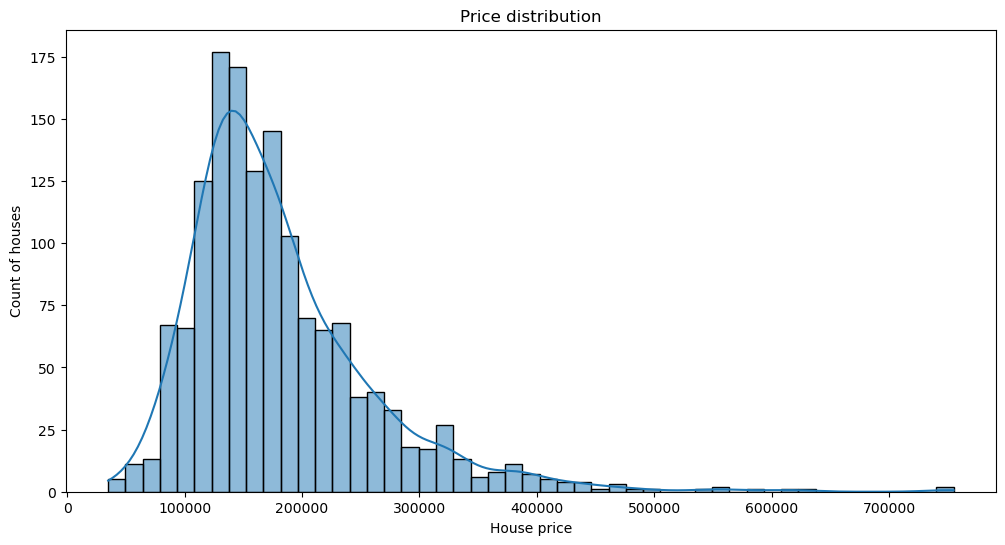

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Price distribution")
plt.xlabel("House price")
plt.ylabel("Count of houses")

plt.show()

In [6]:
print(df['SalePrice'].skew())

1.8828757597682129


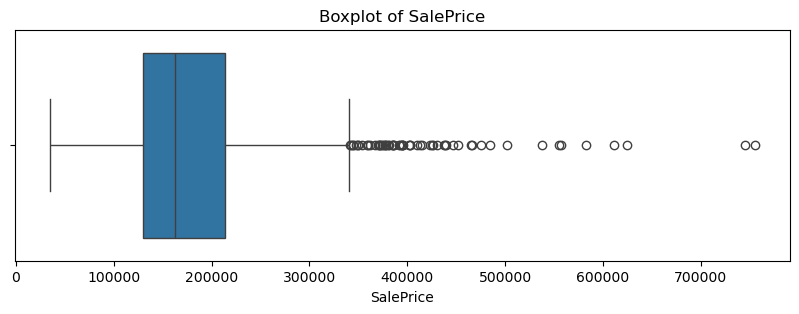

In [7]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

# Analyzing missing values

In [8]:
missing = df.isnull().sum()
missing = missing[missing>0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [9]:
# Count missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Show percentage of missing values too
missing_percentage = (missing / df.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage.round(2)})
print(missing_df)

              Missing Values  Percentage
PoolQC                  1453       99.52
MiscFeature             1406       96.30
Alley                   1369       93.77
Fence                   1179       80.75
MasVnrType               872       59.73
FireplaceQu              690       47.26
LotFrontage              259       17.74
GarageType                81        5.55
GarageYrBlt               81        5.55
GarageFinish              81        5.55
GarageQual                81        5.55
GarageCond                81        5.55
BsmtFinType2              38        2.60
BsmtExposure              38        2.60
BsmtFinType1              37        2.53
BsmtCond                  37        2.53
BsmtQual                  37        2.53
MasVnrArea                 8        0.55
Electrical                 1        0.07


## Filling missing values

In [10]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True) # as missing is very large > 80%

In [12]:
# filling categorical columns with none
categorical_cols = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in categorical_cols:
    df.fillna({col: 'None'}, inplace=True)

In [14]:
df.fillna({'MasVnrArea': 0}, inplace=True)
df.fillna({'GarageYrBlt': df['YearBuilt']}, inplace=True)
df.fillna({'LotFrontage': df['LotFrontage'].median()}, inplace=True)

In [15]:
df.fillna({'Electrical': df['LotFrontage'].mode()[0]}, inplace=True)

In [16]:
# Check for any remaining missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display with percentages
missing_percentage = (missing / df.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage.round(2)})
print(missing_df)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


# Correlation analysis before feature engineering

In [23]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

In [24]:
print("Top correlated features with SalePrice:\n", top_corr)

Top correlated features with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


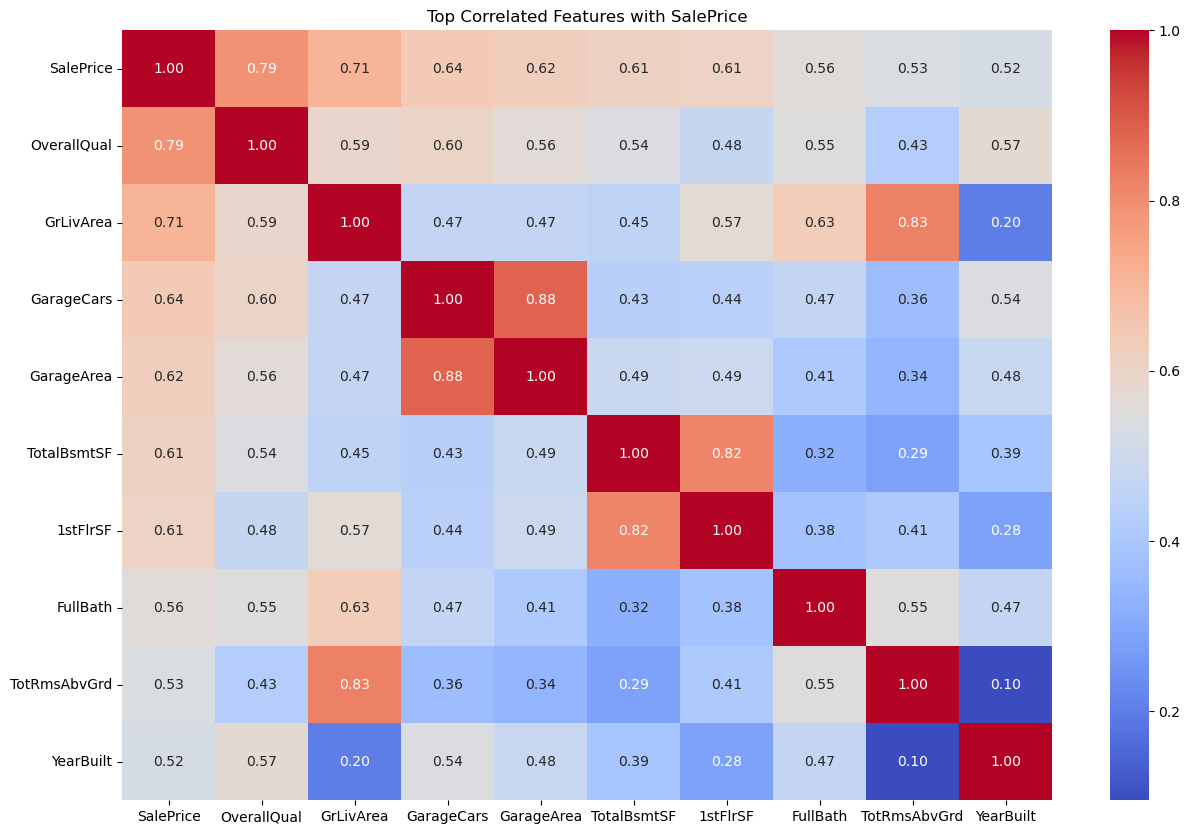

In [27]:
top_features = top_corr.index
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.show()

In [28]:
import numpy as np

df['LogSalePrice'] = np.log(df['SalePrice'])

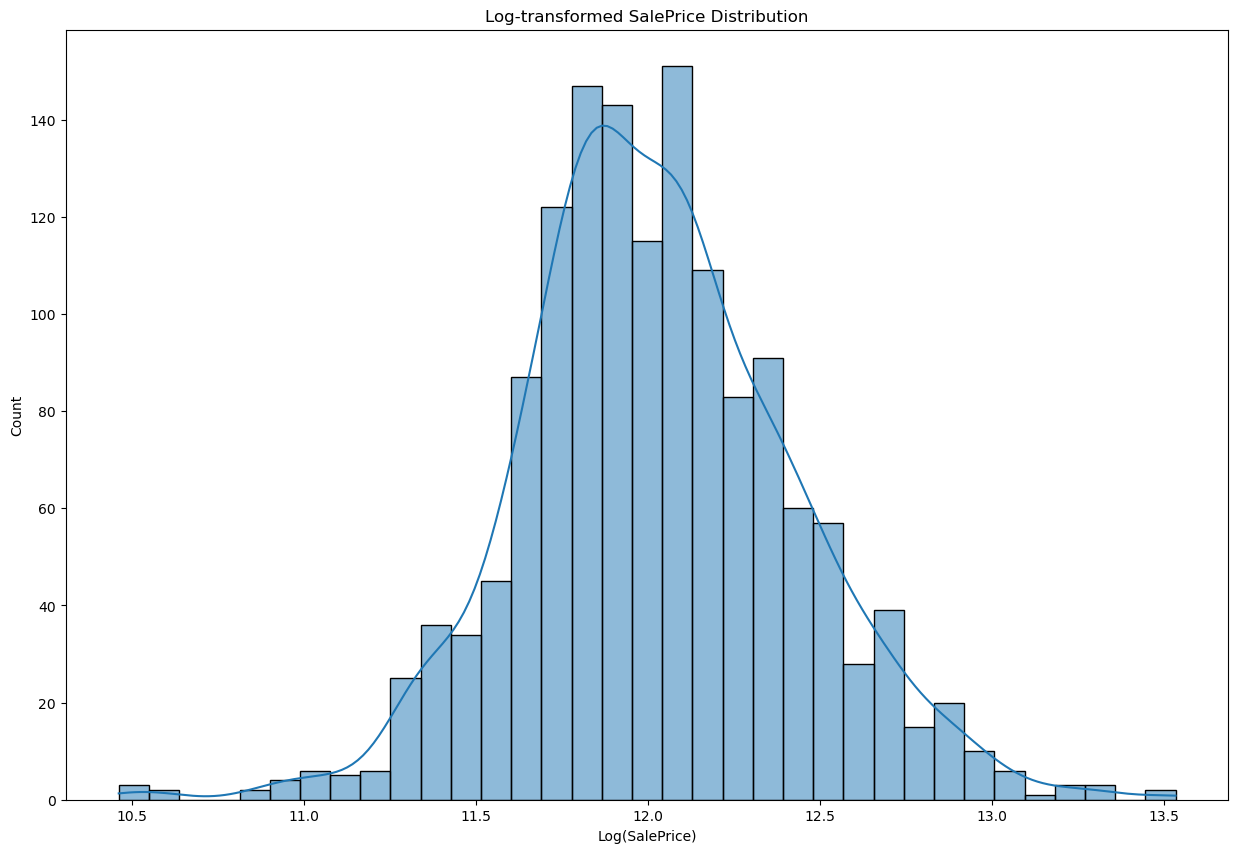

0.12133506220520406


In [29]:
plt.figure(figsize=(15,10))
sns.histplot(df['LogSalePrice'], kde=True)
plt.title("Log-transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice)")
plt.show()

print(df['LogSalePrice'].skew())


In [30]:
selected_features = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','TotRmsAbvGrd','GarageArea','LogSalePrice']

X = df[selected_features[:-1]]  # Excluding target
y = df['LogSalePrice']          # Target

# Adding some features and testing if they are helpful

In [31]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['TotalBathrooms'] = (df['FullBath'] + 0.5 * df['HalfBath'] + df.get('BsmtFullBath', 0) + 0.5 * df.get('BsmtHalfBath', 0))
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df.get('2ndFlrSF', 0)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
df['HasPool'] = (df.get('PoolArea', 0) > 0).astype(int)

In [32]:
X = df[[
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
    'HouseAge', 'TotalBathrooms', 'TotalSF',
    'HasGarage', 'HasFireplace', 'HasPool'
]]

y = df['LogSalePrice']

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Training model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("🔝 Feature Importance:")
print(feature_ranks)

🔝 Feature Importance:
OverallQual       0.460913
TotalSF           0.343883
HouseAge          0.029542
GrLivArea         0.027944
1stFlrSF          0.026605
YearBuilt         0.025763
TotalBathrooms    0.025308
GarageCars        0.020094
TotalBsmtSF       0.019979
HasFireplace      0.008322
TotRmsAbvGrd      0.006366
FullBath          0.002793
HasGarage         0.002026
HasPool           0.000461
dtype: float64


C:\Users\Adham Seliman\AppData\Local\Temp\ipykernel_3108\3970462118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranks.values, y=feature_ranks.index, palette="viridis")


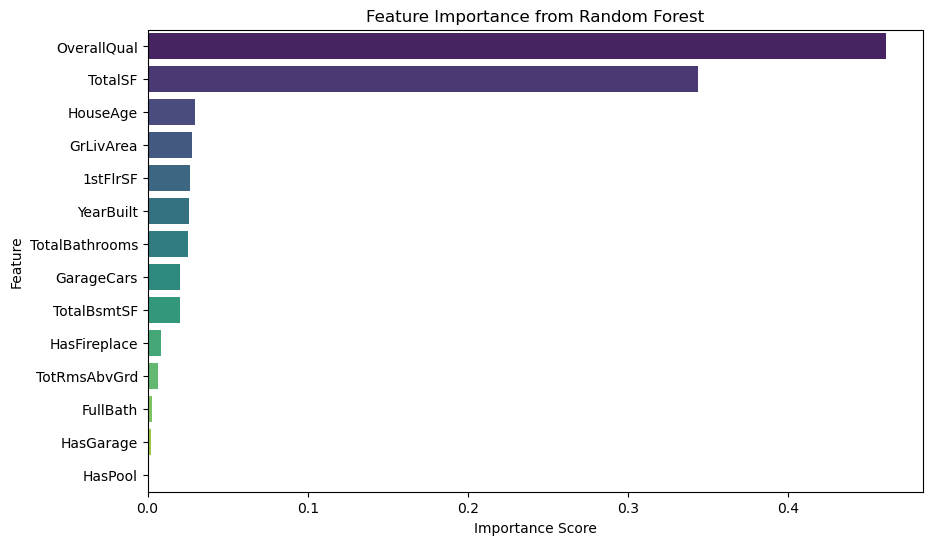

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_ranks.values, y=feature_ranks.index, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [35]:
X = df[[
    'OverallQual', 'TotalSF', 'HouseAge',
    'YearBuilt', 'TotalBathrooms', 'GarageCars'
]]
y = df['LogSalePrice']

# Building linear regression model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = lr_model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.8448
MAE: 0.1210
